<a href="https://colab.research.google.com/github/Adamixa/Airbnb_listing_analysis/blob/main/Airbnb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb analysis:

## 1. Data Loading and Initial Exploration:

### Imports:

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Data Loading:

In [272]:
#df = pd.read_csv('/content/drive/MyDrive/airbnb/Listings.csv', sep = ',', low_memory=False) #colab
df = pd.read_csv('../Airbnb_Data/Listings.csv', sep = ',', low_memory=False) #local

In [273]:
df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,11/29/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,31161181,4/13/2015,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,11/27/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,4/27/2012,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,7/16/2015,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


### Summarizing the Data:

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

### Checking null value percentages:

In [275]:
NA_perc = round((df.isna().sum()/len(df))*100.0,2) # get the NAs per column as perctentage
NA_perc

listing_id                      0.00
name                            0.06
host_id                         0.00
host_since                      0.06
host_location                   0.30
host_response_time             46.04
host_response_rate             46.04
host_acceptance_rate           40.43
host_is_superhost               0.06
host_total_listings_count       0.06
host_has_profile_pic            0.06
host_identity_verified          0.06
neighbourhood                   0.00
district                       86.77
city                            0.00
latitude                        0.00
longitude                       0.00
property_type                   0.00
room_type                       0.00
accommodates                    0.00
bedrooms                       10.52
amenities                       0.00
price                           0.00
minimum_nights                  0.00
maximum_nights                  0.00
review_scores_rating           32.68
review_scores_accuracy         32.79
r

In [333]:
NA_perc[NA_perc>40] #get the columns with more than 40% null values 

host_response_time      46.04
host_response_rate      46.04
host_acceptance_rate    40.43
district                86.77
dtype: float64

We can see that 4 columns exceed our 40% null value threshold which are:
- host_response_time
- host_response_rate
- host_acceptance_rate
- district

### Finding all non numeric columns:

In [277]:
df.select_dtypes(exclude='number').columns.tolist()

['name',
 'host_since',
 'host_location',
 'host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'district',
 'city',
 'property_type',
 'room_type',
 'amenities',
 'instant_bookable']

### Checking for duplicates:

In [278]:
dup_rows = df.duplicated() # check for duplicate
dup_rows.sum() # number of duplicates

0

No duplicates were found

## 2. Data Cleaning:

### Making a copy of the dataframe before cleaning for comparison:

In [279]:
df2 = df


### Dealing with Null Values:

In [280]:
# we are dropping the district column as it is nearly 90% filled with null values
df.drop(['district'], axis=1, inplace=True)
df.drop([])

In [281]:
# filling the missing host response time and rate, as well host acceptance rate with the mode of each of the respective columns 
hrt_mean = df['host_response_time'].mode()[0]
hrr_mean = df['host_response_rate'].mode()[0]
har_mean = df['host_acceptance_rate'].mode()[0]
df.host_response_time.fillna(hrt_mean, inplace=True)
df.host_response_rate.fillna(hrr_mean, inplace=True)
df.host_acceptance_rate.fillna(har_mean, inplace = True)

In [282]:
df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,11/29/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,31161181,4/13/2015,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,11/27/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,4/27/2012,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,7/16/2015,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


### Changing boolean columns from object (or string) to boolean because they are binary columns

In [283]:
df['instant_bookable'] = df['instant_bookable'].replace({'f': False, 't': True })
df.instant_bookable = df.instant_bookable.astype(bool)

In [284]:
df['host_is_superhost'] = df['host_is_superhost'].replace({'f': False, 't': True })
df.host_is_superhost = df.host_is_superhost.astype(bool)

In [285]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].replace({'f': False, 't': True })
df.host_has_profile_pic = df.host_has_profile_pic.astype(bool)

In [286]:
df['host_identity_verified'] = df['host_identity_verified'].replace({'f': False, 't': True })
df.host_identity_verified = df.host_identity_verified.astype(bool)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           279712 non-null  object 
 6   host_response_rate           279712 non-null  float64
 7   host_acceptance_rate         279712 non-null  float64
 8   host_is_superhost            279712 non-null  bool   
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279712 non-null  bool   
 11  host_identity_verified       279712 non-null  bool   
 12  neighbourhood                279712 non-null  object 
 13 

### Changing unnecessary float columns into int:

In [288]:
df.bedrooms = df.bedrooms.astype('Int64')

In [289]:
df.host_total_listings_count = df.host_total_listings_count.astype('Int64')

### Changing unnecessary string/object columns to float or int:

In [290]:
df.host_response_rate = df.host_response_rate.astype('float64')

### Changing the review_score_rating to 10 scale instead of 100 scale

In [291]:
df['review_scores_rating']= df['review_scores_rating']/10

### Dealing with outliers:

In [292]:
df.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,279712.000000,279712.000000,279547.0,279712.000000,279712.000000,279712.000000,250277.0,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.927662,0.897044,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,9.340519,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.218878,0.238783,284.041143,32.560343,73.081309,2.133379,1.15308,3441.826611,31.518946,7.282875e+06,1.007044,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.0,-34.264400,-99.339630,0.000000,1.0,0.000000,1.000000,1.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,1.000000,0.950000,1.0,-22.964390,-43.198040,2.000000,1.0,75.000000,1.000000,4.500000e+01,9.100000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,1.000000,1.0,40.710785,2.382780,2.000000,1.0,150.000000,2.000000,1.125000e+03,9.600000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.0,41.908610,28.986730,4.000000,2.0,474.000000,5.000000,1.125000e+03,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.0,48.904910,151.339810,16.000000,50.0,625216.000000,9999.000000,2.147484e+09,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [293]:
# Finding the first and third quartile and calculating IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1

In [294]:
#setting the lower and upper limit accordingly 
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [295]:
lower_lim

-523.5

In [296]:
upper_lim

1072.5

In [297]:
#finding outliers both above and below our respective limits 
outliers_low = (df['price'] < lower_lim)
outliers_high = (df['price'] > upper_lim)
len(df['price']) - (len(df['price'][outliers_low])+(len(df['price'][outliers_high])))

248317

In [298]:
#outliers 
df['price'][outliers_high | outliers_low]

3423      2000
7883      1200
8549      6742
9165      1543
9244      1409
          ... 
273180    8977
273937    4000
274429    3300
274835    1100
277724    3000
Name: price, Length: 31395, dtype: int64

In [299]:
#data without the outliers
df['price'][~(outliers_high | outliers_low)]

0          53
1         120
2          89
3          58
4          60
         ... 
279707    120
279708     60
279709     50
279710    105
279711     70
Name: price, Length: 248317, dtype: int64

In [300]:
#overwriting the data frame without including the outliers 
df = df[~(outliers_high | outliers_low)]

In [301]:
df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,2,1125,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,11/29/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,2,1125,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,2,1125,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,2,1125,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,2,1125,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,31161181,4/13/2015,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,1,7,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False
279708,38538692,Cozy Studio in Montmartre,10294858,11/27/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,7,15,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,4/27/2012,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,6,30,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,7/16/2015,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,3,18,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False


### Looking at unique object values:

In [302]:
# take a look at the values
for col in df.nunique()[df.nunique() <100].index:
    print(col,":", df[col].unique() )

host_response_time : ['within an hour' 'within a few hours' 'within a day' 'a few days or more']
host_response_rate : [1.   0.   0.5  0.67 0.9  0.86 0.83 0.8  0.75 0.88 0.79 0.89 0.94 0.71
 0.95 0.3  0.25 0.6  0.33 0.43 0.2  0.84 0.4  0.92 0.17 0.97 0.87 0.38
 0.7  0.58 0.76 0.78 0.44 0.91 0.1  0.14 0.57 0.56 0.05 0.77 0.96 0.93
 0.72 0.29 0.63 0.11 0.68 0.69 0.81 0.82 0.73 0.98 0.85 0.46 0.22 0.99
 0.23 0.13 0.36 0.12 0.47 0.55 0.06 0.08 0.09 0.62 0.65 0.64 0.28 0.53
 0.39 0.59 0.41 0.27 0.31 0.03 0.74 0.52 0.04 0.54 0.61 0.07 0.45 0.21
 0.42 0.51 0.48 0.19 0.01 0.15 0.24]
host_is_superhost : [False  True]
host_has_profile_pic : [ True False]
host_identity_verified : [False  True]
district : [nan 'Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']
city : ['Paris' 'New York' 'Bangkok' 'Rio de Janeiro' 'Sydney' 'Istanbul' 'Rome'
 'Cape Town' 'Mexico City' 'Hong Kong']
room_type : ['Entire place' 'Private room' 'Hotel room' 'Shared room']
accommodates : [ 2  4  3  1  5  6  7  8  9 1

In [303]:
# col_to_plot = df.select_dtypes(exclude='number').columns.tolist()
# f, axes = plt.subplots(round(len(col_to_plot)/2),2, figsize=(10, 15))
# for i,x in zip(col_to_plot,axes.flat):
#     sns.countplot(data = df ,x = str(i) ,ax = x  ,palette="muted")
# f.show()
# plt.tight_layout()

### Comparing size of dataframe before and after cleaning

In [304]:
df2.shape

(279712, 33)

In [305]:
df.shape

(248317, 33)

## 4. Feature Engineering (moved up to be used in EDA)

First we will create a reduced version of the listings dataframe

In [306]:
dfstripped = df[['listing_id','name','city','price', 'instant_bookable']]
dfstripped

,listing_id,name,city,price,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",Paris,53,False
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),Paris,120,False
2,4082273,"Lovely apartment with Terrace, 60m2",Paris,89,False
3,4797344,Cosy studio (close to Eiffel tower),Paris,58,False
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,Paris,60,False
...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,Paris,120,False
279708,38538692,Cozy Studio in Montmartre,Paris,60,False
279709,38683356,Nice and cosy mini-appartement in Paris,Paris,50,False
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,Paris,105,False


Then we will add the reviews dataframe

In [307]:
#dfr = pd.read_csv('/content/drive/MyDrive/airbnb/Reviews.csv', sep = ',') #colab
dfr = pd.read_csv('../Airbnb_Data/Reviews.csv', sep = ',') #local
dfr

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859
...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516
5373139,47823964,727963021,2021-01-31,76411977
5373140,47896175,728548625,2021-02-02,71370946
5373141,47900451,727399287,2021-01-29,109011160


we combine the reduced dataframe with the reviews dataset

In [308]:
df_combined = pd.merge(dfstripped, dfr, on=["listing_id"])
df_combined


,listing_id,name,city,price,instant_bookable,review_id,date,reviewer_id
0,281420,"Beautiful Flat in le Village Montmartre, Paris",Paris,53,False,173279221,2017-07-23,3501898
1,281420,"Beautiful Flat in le Village Montmartre, Paris",Paris,53,False,172657766,2017-07-21,74346703
2,3705183,39 mÂ² Paris (Sacre CÅ“ur),Paris,120,False,20792760,2014-10-05,21583508
3,3705183,39 mÂ² Paris (Sacre CÅ“ur),Paris,120,False,32282670,2015-05-16,32285553
4,3705183,39 mÂ² Paris (Sacre CÅ“ur),Paris,120,False,45645391,2015-09-04,34310199
...,...,...,...,...,...,...,...,...
4953988,38683356,Nice and cosy mini-appartement in Paris,Paris,50,False,532395580,2019-09-19,10347403
4953989,38683356,Nice and cosy mini-appartement in Paris,Paris,50,False,553159713,2019-10-23,197011717
4953990,39659000,Charming apartment near Rue Saint Maur / Oberk...,Paris,105,False,556350613,2019-10-29,102836346
4953991,40219504,Cosy apartment with view on Canal St Martin,Paris,70,False,597833586,2020-01-26,21707358


We count how many reviews each listing have and put them in a series

In [309]:
counts = df_combined.groupby('listing_id').size()
counts

listing_id
2577         1
2595        48
2737         7
2903        55
3079        17
            ..
48228566     1
48229422     1
48255009     1
48256649     1
48263869     1
Length: 175475, dtype: int64

we merge that series onto the listings dataset as number_of_reviews column

In [310]:
df = df.merge(counts.rename('number_of_reviews'), on=['listing_id'])

we add a new column of the average of all the review scores and then drop all of the unnesscary columns  

In [311]:
df['review_score_average'] = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].mean(axis=1)

In [312]:
df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,number_of_reviews,review_score_average
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False,2,10.0
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,11/29/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False,6,10.0
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1,10.0
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1,10.0
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175470,38338635,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,31161181,4/13/2015,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False,2,10.0
175471,38538692,Cozy Studio in Montmartre,10294858,11/27/2013,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False,2,10.0
175472,38683356,Nice and cosy mini-appartement in Paris,2238502,4/27/2012,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False,3,10.0
175473,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,7/16/2015,"Paris, Ile-de-France, France",within an hour,1.0,1.0,False,1,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1,10.0


In [313]:
df = df.drop(['review_scores_rating', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1)

## 3. Exploratory Data Analysis:

C:\Users\adami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


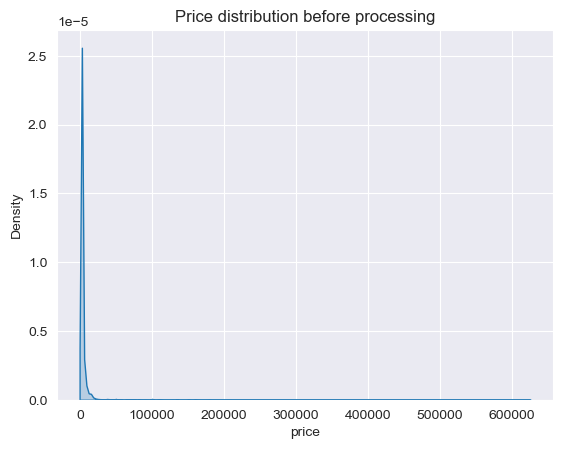

In [314]:
sns.kdeplot(x = "price" ,data =df2.replace([np.inf, -np.inf], np.nan), fill=True)
plt.title("Price distribution before processing");

C:\Users\adami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


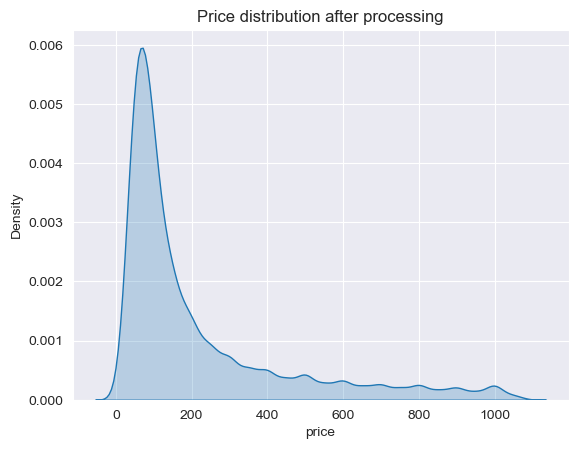

In [315]:
sns.kdeplot(x = "price" ,data =df.replace([np.inf, -np.inf], np.nan), fill=True)
plt.title("Price distribution after processing");

Text(0, 0.5, 'Price')

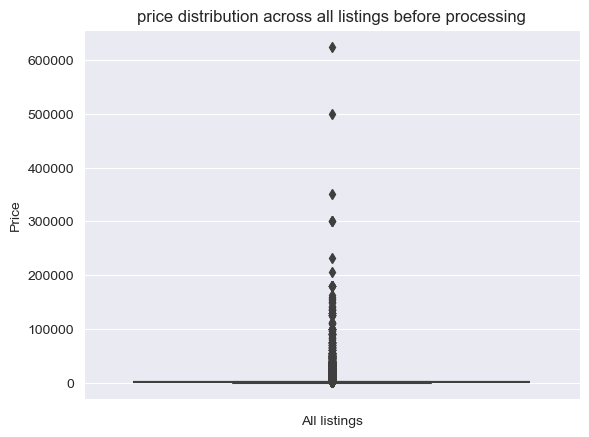

In [316]:
sns.boxplot( y = 'price', data = df2)
plt.title('price distribution across all listings before processing')
plt.xlabel('All listings')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

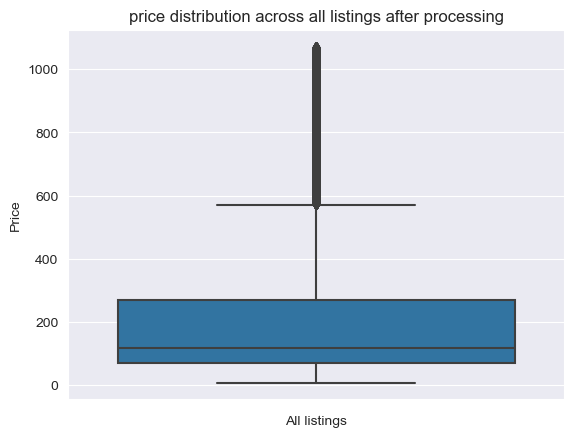

In [317]:
sns.boxplot( y = 'price', data = df)
plt.title('price distribution across all listings after processing')
plt.xlabel('All listings')
plt.ylabel('Price')

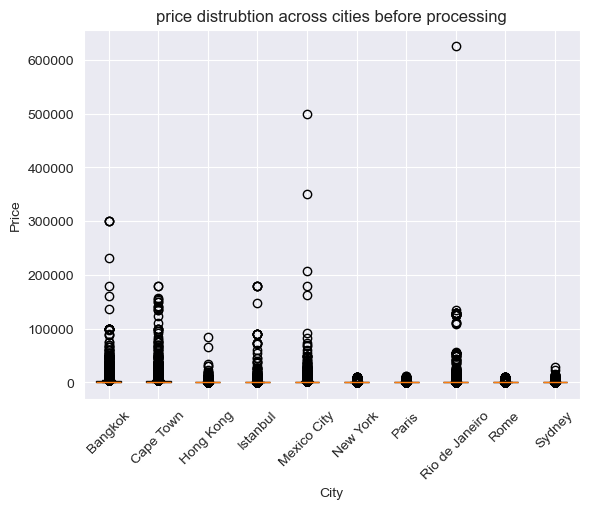

In [318]:
grouped_data = df2.groupby('city')['price']

fig, ax = plt.subplots()
bplot=ax.boxplot([grouped_data.get_group(city) for city in grouped_data.groups.keys()],patch_artist=True)

plt.title('price distrubtion across cities before processing')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
colors = ['pink', 'lightblue', 'lightgreen', 'lightcyan', 'red', 'purple', 'blue', 'green', 'white']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(grouped_data.groups.keys())

plt.show()

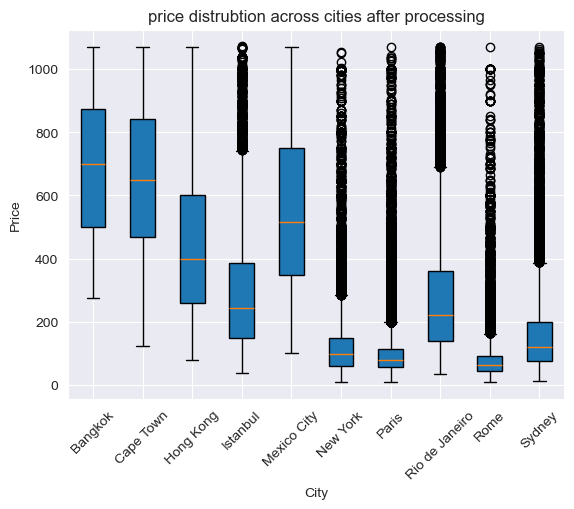

In [319]:
grouped_data = df.groupby('city')['price']

fig, ax = plt.subplots()
bplot=ax.boxplot([grouped_data.get_group(city) for city in grouped_data.groups.keys()],patch_artist=True)

plt.title('price distrubtion across cities after processing')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)


ax.set_xticklabels(grouped_data.groups.keys())

plt.show()

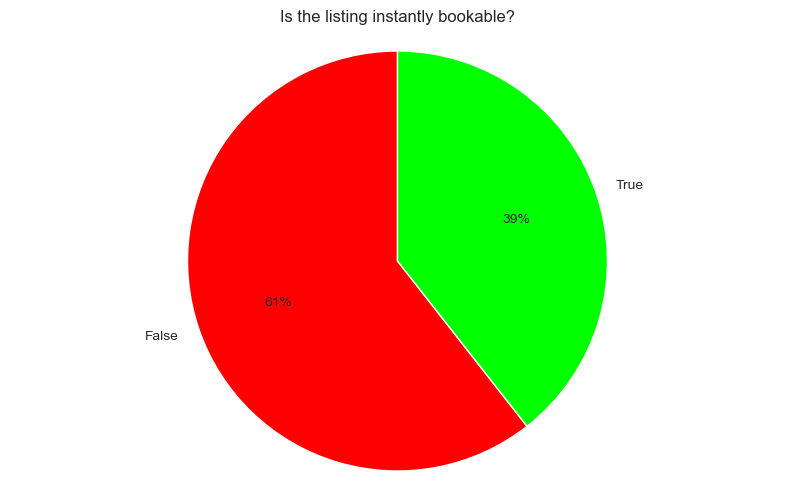

In [320]:
instant_count = df['instant_bookable'].value_counts() # Calculate the count of each
custom_colors = ['#FF0000', '#00FF00']

plt.figure(figsize=(10, 6)) # Create pie chart
plt.pie(instant_count, labels=instant_count .index, autopct='%1.0f%%', startangle=90, colors=custom_colors)
plt.axis('equal')
plt.title('Is the listing instantly bookable?')
plt.show()

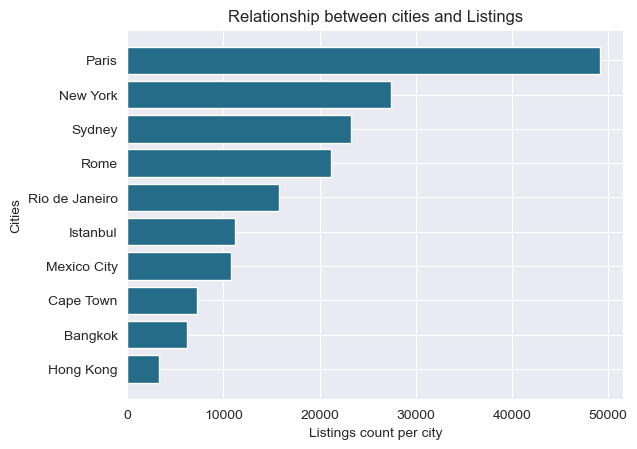

In [321]:
city_count = df.groupby('city')['city'].count().sort_values()


plt.barh(city_count.index, city_count, color='#246C88')

plt.ylabel('Cities')
plt.xlabel('Listings count per city')
plt.title('Relationship between cities and Listings')

plt.show()

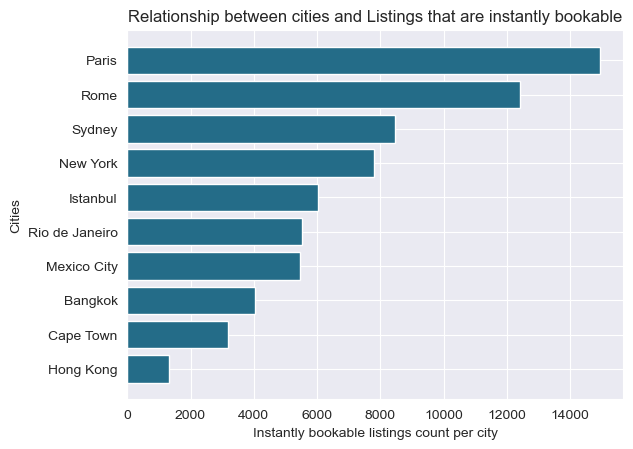

In [322]:
city_count = df.query("instant_bookable").groupby('city')['city'].count().sort_values()


plt.barh(city_count.index, city_count, color='#246C88')


plt.ylabel('Cities')
plt.xlabel('Instantly bookable listings count per city')
plt.title('Relationship between cities and Listings that are instantly bookable')

plt.show()

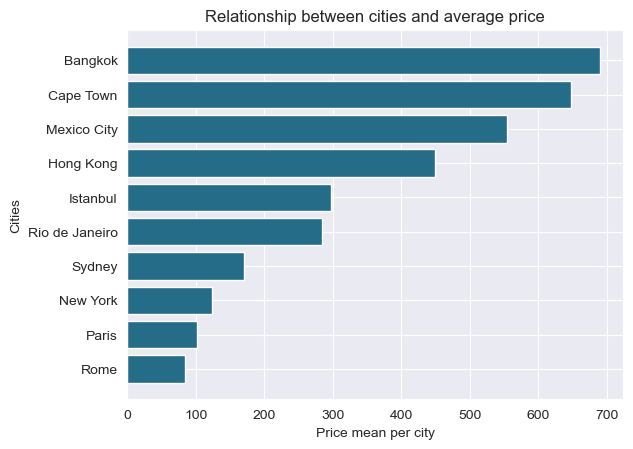

In [323]:
city_count = df.groupby('city')['price'].mean().sort_values()


plt.barh(city_count.index, city_count, color='#246C88')

plt.ylabel('Cities')
plt.xlabel('Price mean per city')
plt.title('Relationship between cities and average price')

plt.show()

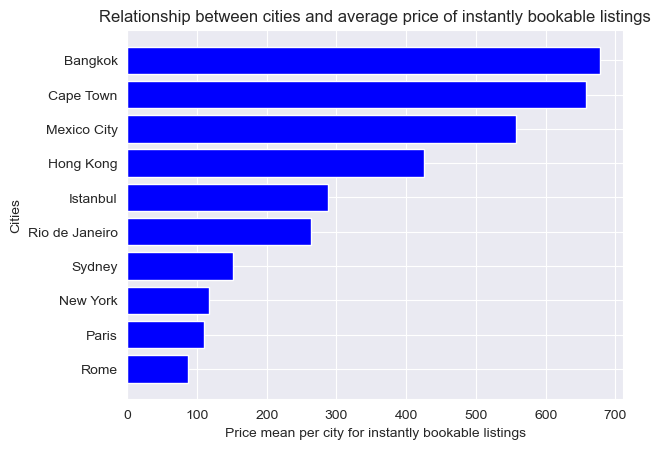

In [324]:
city_count = df.query("instant_bookable").groupby('city')['price'].mean().sort_values()


plt.barh(city_count.index, city_count, color='#0000FF')


plt.ylabel('Cities')
plt.xlabel('Price mean per city for instantly bookable listings')
plt.title('Relationship between cities and average price of instantly bookable listings')

plt.show()

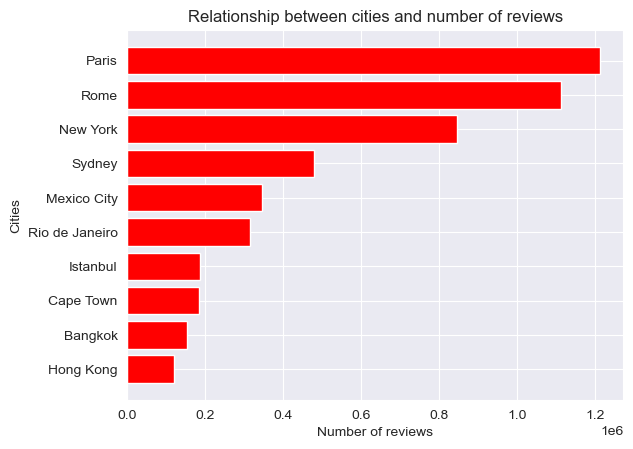

In [325]:
review_count = df.groupby('city')['number_of_reviews'].sum().sort_values()


plt.barh(review_count.index, review_count, color='#FF0000')


plt.ylabel('Cities')
plt.xlabel('Number of reviews')
plt.title('Relationship between cities and number of reviews')

plt.show()

Text(0, 0.5, 'Host property type')

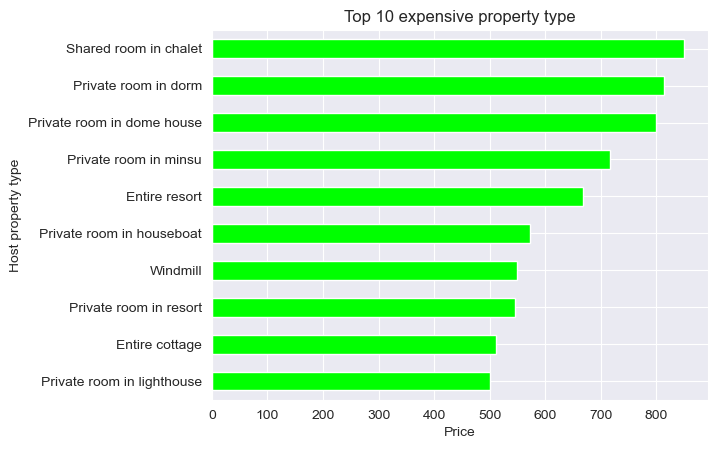

In [326]:
df.groupby(['property_type'])['price'].mean().sort_values(ascending=True)[-10:].plot.barh(color='#00FF00')
plt.title('Top 10 expensive property type')
plt.xlabel('Price')
plt.ylabel('Host property type')

Text(0, 0.5, 'Host property type')

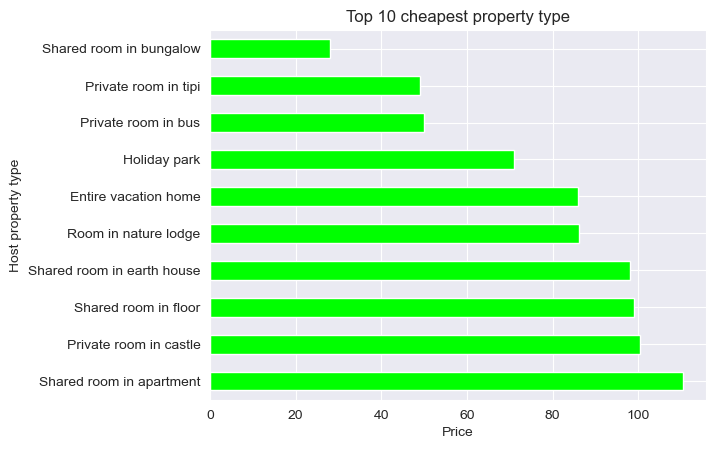

In [327]:
df.groupby(['property_type'])['price'].mean().sort_values(ascending=False)[-10:].plot.barh(color='#00FF00')
plt.title('Top 10 cheapest property type')
plt.xlabel('Price')
plt.ylabel('Host property type')

In [328]:
# create a list with the names of numerical columns data
numerics = ['accommodates', 'bedrooms', 'minimum_nights', 'maximum_nights', 'review_score_average', 'number_of_reviews']
#using the above columns list and price create a new dataframe
numeric_df = df[numerics + ['price']]

#calculate correlation matrix
correlation_matrix = numeric_df.corr()

#sorting the matrix by price in descending order
price_correlation = correlation_matrix['price'].sort_values(ascending = False)

#print the attributes that have highest correlation with price
print(price_correlation)

price                   1.000000
accommodates            0.201658
bedrooms                0.188334
review_score_average    0.024214
maximum_nights         -0.000572
minimum_nights         -0.027530
number_of_reviews      -0.034365
Name: price, dtype: float64


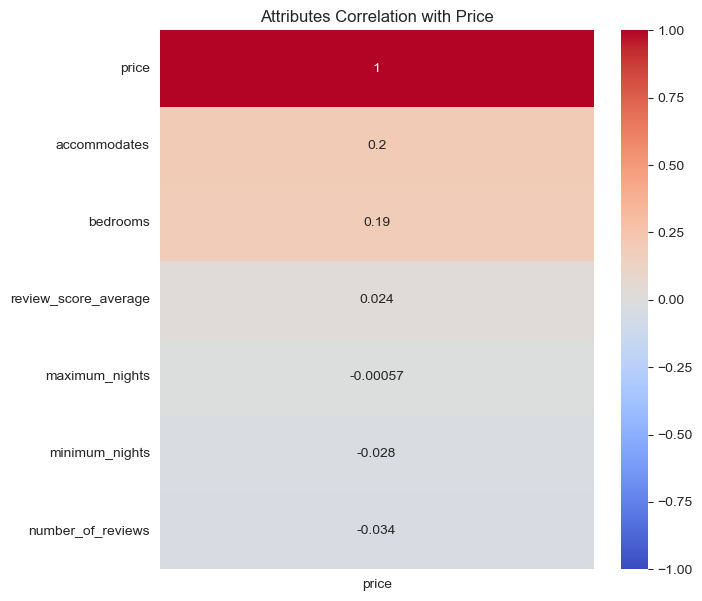

In [330]:
plt.figure(figsize = (7,7))
sns.heatmap(correlation_matrix[['price']].sort_values(by=['price'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.title('Attributes Correlation with Price')
plt.show();

## 5. Conclusion:

##### * Nearly two thirds of listings are not instantly bookable, which would mean travelers need to plan ahead, additionally this means hosts have a very open mark to capitalize on this by ramping up their operations and providing listings that are instantly bookable to provide spontaneous travelers with more options. 
##### * Paris leads in overall listings both instantly bookable and not, which means that travelers to paris are spoiled for choice, additionally landlords looking to purchase assets to rent out on airbnb might want to avoid paris due to the huge number of listings. 
##### * Spontaneous travelers on a budget would want to go to Rome as it has the best instantly bookable listings to price ratio of all other cities, coming in only second behind Paris, and being the absolute cheapest city in the dataset.
##### * Travelers on a budget should seek shared rooms in bungalows, earth houses, and apartments as they are among the cheapest property types in the dataset
##### * Travelers who like to have assurances should look at Rome, and New York as they have the highest ratio of reviews per listings of all other cities
##### * How many people a listing accommodates and how many bedrooms it has, seem to be the biggest factors on a listing's price, so travelers should make sure they don't book a listing that accommodates more people than needed or has bedrooms more than necessary to avoid paying extra